# Austin Traffic Data Analysis: Part 1 - Fundamentals

Austin generates over 400,000 traffic incidents per year. During the 2020 pandemic, traffic patterns changed dramatically - but not in ways you might expect.

We'll use computational methods to uncover these hidden patterns and learn what they tell us about urban infrastructure resilience.

## Variables and Data Discovery

### Variables: Storing Information

Variables are handles for values. When we write:

In [30]:
incident_count = 432444

The expression on the right (432444) is evaluated and stored in the variable on the left (incident_count). This follows the mathematical notation: variable ← value

In engineering, we need variables to track:
- Measurements that change over time
- Parameters we want to adjust
- Results we need to reference later

### Data Types Define What We Can Do

Objects have types that determine valid operations:
- Can multiply two numbers
- Cannot multiply a number and text
- Each type serves a specific purpose

In [31]:
# Integer: whole numbers for counts
crashes_2019 = 68051
crashes_2020 = 45321

# Float: decimals for coordinates  
austin_latitude = 30.2672
austin_longitude = -97.7431

# String: text for categories
incident_type = "Crash Urgent"
data_source = "Austin Open Data Portal"

# Boolean: True/False for conditions
is_pandemic_year = True
has_valid_coordinates = False

In [32]:
# Operations with variables
change = crashes_2020 - crashes_2019
percent_change = (change / crashes_2019) * 100

print(f"{change} incidents")
print(f"{percent_change:.1f}%")

-22730 incidents
-33.4%


### Lists: Storing Multiple Values

A list is an ordered collection of values. Lists can contain any type of data and can be modified.

In [33]:
# List of years to analyze
years = [2019, 2020, 2021, 2022]

# List of incident types
incident_types = ["Crash Urgent", "Traffic Hazard", "COLLISION", "Stalled Vehicle"]

# Access elements by index (starts at 0)
first_year = years[0]
pandemic_year = years[1]

print(f"First year: {first_year}")
print(f"Pandemic year: {pandemic_year}")

First year: 2019
Pandemic year: 2020


In [34]:
# Lists can be modified
years.append(2023)
print(f"Updated years: {years}")

# Get length of list
num_years = len(years)
print(f"Analyzing {num_years} years")

Updated years: [2019, 2020, 2021, 2022, 2023]
Analyzing 5 years


### CSV: Comma Separated Values

A CSV file is like a spreadsheet stored as text:
- Each row = one traffic incident  
- Each column = one attribute (date, location, type)
- Commas separate the values

Example row:
```
03/06/2024 01:29:39 AM,Stalled Vehicle,30.32358,-97.705874,IH 35,AUSTIN PD
```

### DataFrames: Smart Tables for Engineering Data

With 400,000+ incidents and 10+ attributes each, we need structure. A DataFrame is a 2D labeled data structure that:
- Handles different data types per column
- Provides powerful filtering and analysis methods
- Scales to millions of rows efficiently

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Austin traffic incidents
df = pd.read_csv('Real-Time_Traffic_Incident_Reports_20250805.csv')

In [36]:
# Basic exploration
num_incidents = len(df)
num_attributes = len(df.columns)

print(f"Dataset: {num_incidents:,} incidents")
print(f"Attributes per incident: {num_attributes}")

Dataset: 432,444 incidents
Attributes per incident: 10


In [37]:
# Display column names
df.columns

Index(['Traffic Report ID', 'Published Date', 'Issue Reported', 'Location',
       'Latitude', 'Longitude', 'Address', 'Status', 'Status Date', 'Agency'],
      dtype='object')

In [38]:
# Show first few incidents
df.head(3)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF


### Extracting Time Information

Traffic patterns vary by time. We need to extract:
- Year: for pandemic comparison
- Month: for seasonal patterns
- Hour: for daily patterns

In [39]:
# Convert string dates to datetime objects
df['Date'] = pd.to_datetime(df['Published Date'])

# Extract components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour

In [40]:
# Count incidents per year
yearly_counts = df['Year'].value_counts().sort_index()
yearly_counts

Year
2017    17194
2018    70070
2019    68051
2020    45321
2021    51338
2022    53109
2023    51109
2024    48285
2025    27967
Name: count, dtype: int64

In [41]:
# Most common incident types
incident_type_counts = df['Issue Reported'].value_counts().head(5)
incident_type_counts

Issue Reported
Traffic Hazard       127772
Crash Urgent         105530
Crash Service         59219
COLLISION             44902
TRFC HAZD/ DEBRIS     33386
Name: count, dtype: int64

### Plotting All Incidents: What Could Go Wrong?

Let's visualize all traffic incidents on a map. Since we have latitude and longitude for each incident, this should be straightforward...

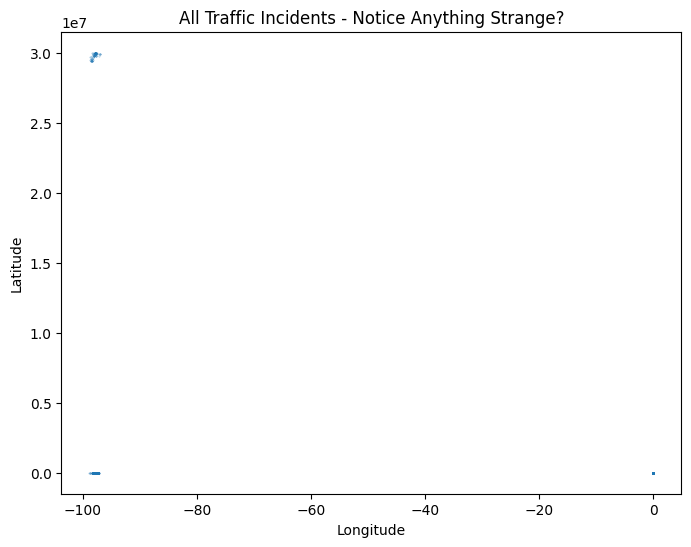

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df.Longitude, df.Latitude, s=0.1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All Traffic Incidents - Notice Anything Strange?')
plt.show()

### Data Quality Issues Revealed

The plot shows:
1. Points at (0, 0) - missing coordinates
2. Points far from Austin - data entry errors
3. Extreme outliers at -100 longitude

This is real-world data: messy and requiring cleaning before analysis.

## Conditional Statements for Data Cleaning

### Boolean Values: Making Decisions

Booleans are True or False values used for decision-making. They result from comparisons and control program flow.

In [43]:
# Simple boolean examples
year = 2020
is_pandemic = year == 2020  # True
print(f"Is 2020 the pandemic year? {is_pandemic}")

latitude = 30.2672
is_in_austin = latitude > 30.0 and latitude < 30.6  # True
print(f"Is latitude {latitude} in Austin? {is_in_austin}")

# Check data quality
lat_is_zero = 0.0
lon_is_zero = 0.0
is_missing_data = (lat_is_zero == 0) and (lon_is_zero == 0)  # True
print(f"Are coordinates missing? {is_missing_data}")

Is 2020 the pandemic year? True
Is latitude 30.2672 in Austin? True
Are coordinates missing? True


### Comparison Operators Create Booleans

```
==  Equal to
!=  Not equal to
<   Less than  
>   Greater than
<=  Less than or equal
>=  Greater than or equal
```

Combine with:
- `and` - Both must be True
- `or` - Either can be True
- `not` - Negates the condition

### Creating Boolean Masks for Austin Area

In [44]:
# Define Austin's approximate boundaries
austin_lat_min = 30.0
austin_lat_max = 30.6
austin_lon_min = -98.0
austin_lon_max = -97.0

# Create boolean conditions for each coordinate
valid_latitude = (df['Latitude'] > austin_lat_min) & (df['Latitude'] < austin_lat_max)
valid_longitude = (df['Longitude'] > austin_lon_min) & (df['Longitude'] < austin_lon_max)

# Check how many are valid
num_valid_lat = valid_latitude.sum()
num_valid_lon = valid_longitude.sum()

print(f"Valid latitudes: {num_valid_lat:,}")
print(f"Valid longitudes: {num_valid_lon:,}")

Valid latitudes: 431,221
Valid longitudes: 426,769


### Boolean Indexing: Selecting Valid Data

We use boolean arrays to select rows that meet our criteria. `df[boolean_condition]` returns only rows where condition is True.

In [45]:
# Combine conditions
valid_coordinates = valid_latitude & valid_longitude

# Filter to Austin-only data
austin_data = df[valid_coordinates]

# Compare before and after
print(f"Original: {len(df):,} incidents")
print(f"Austin only: {len(austin_data):,} incidents")
print(f"Removed: {len(df) - len(austin_data):,} bad records")

Original: 432,444 incidents
Austin only: 426,603 incidents
Removed: 5,841 bad records


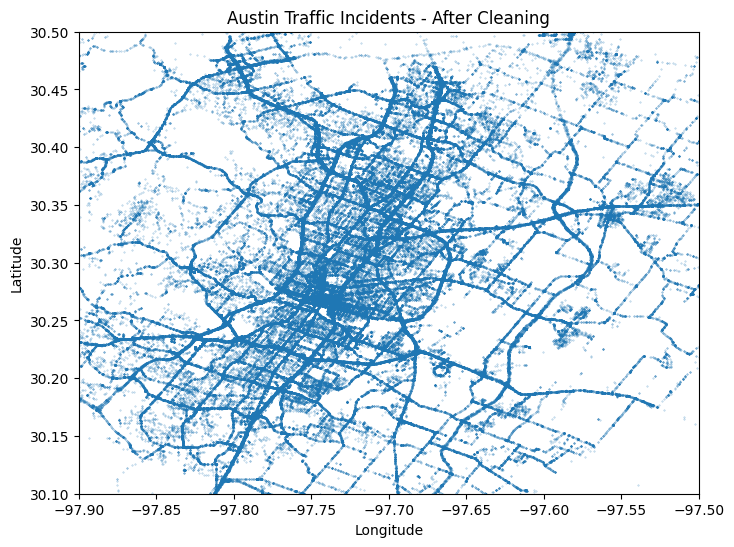

In [46]:
# Visualize cleaned data
plt.figure(figsize=(8, 6))
plt.scatter(austin_data.Longitude, austin_data.Latitude, s=0.1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')  
plt.title('Austin Traffic Incidents - After Cleaning')
plt.xlim(-97.9, -97.5)
plt.ylim(30.1, 30.5)
plt.show()

### Control Statements: Program Decision Making

Programs need to make decisions based on data:

```python
if condition:
    # Do this if True
elif other_condition:
    # Do this if first False but this True
else:
    # Do this if all False
```

In [47]:
# Calculate yearly incidents
incidents_2019 = len(austin_data[austin_data['Year'] == 2019])
incidents_2020 = len(austin_data[austin_data['Year'] == 2020])
incidents_2021 = len(austin_data[austin_data['Year'] == 2021])

# Analyze pandemic impact
if incidents_2019 > 0:
    change = incidents_2020 - incidents_2019
    percent = (change / incidents_2019) * 100
    
    if percent < -30:
        impact = "Major reduction"
    elif percent < -10:
        impact = "Moderate reduction"
    elif percent > 10:
        impact = "Increase despite lockdowns"
    else:
        impact = "Relatively stable"
        
    print(f"2019: {incidents_2019:,} incidents")
    print(f"2020: {incidents_2020:,} incidents")
    print(f"Change: {percent:.1f}% - {impact}")

2019: 67,278 incidents
2020: 44,631 incidents
Change: -33.7% - Major reduction


### Filtering by Incident Type

In [48]:
# Different incident types
collision_filter = austin_data['Issue Reported'] == 'COLLISION'
crash_filter = austin_data['Issue Reported'] == 'Crash Urgent'
hazard_filter = austin_data['Issue Reported'] == 'Traffic Hazard'

# Apply filters
collisions = austin_data[collision_filter]
crashes = austin_data[crash_filter]
hazards = austin_data[hazard_filter]

print(f"Collisions: {len(collisions):,}")
print(f"Crashes: {len(crashes):,}")
print(f"Hazards: {len(hazards):,}")

Collisions: 43,256
Crashes: 105,452
Hazards: 127,550


### Comparative Incident Maps

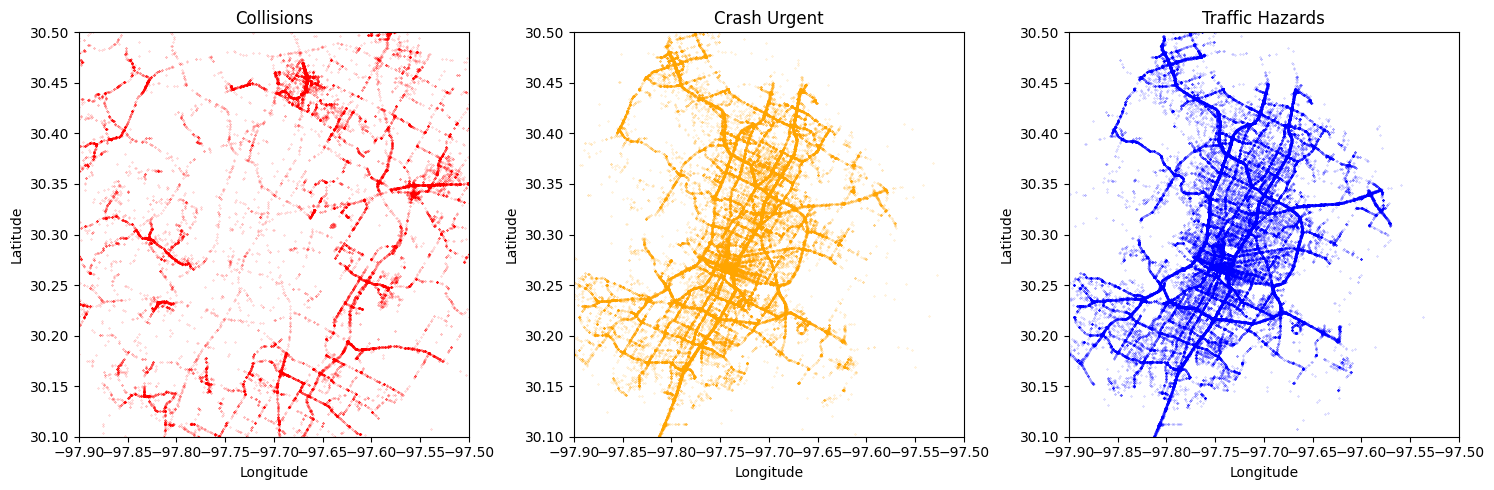

In [49]:
# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot collisions
axes[0].scatter(collisions.Longitude, collisions.Latitude, s=0.05, alpha=0.5, c='red')
axes[0].set_title('Collisions')
axes[0].set_xlim(-97.9, -97.5)
axes[0].set_ylim(30.1, 30.5)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Plot crashes  
axes[1].scatter(crashes.Longitude, crashes.Latitude, s=0.05, alpha=0.5, c='orange')
axes[1].set_title('Crash Urgent')
axes[1].set_xlim(-97.9, -97.5)
axes[1].set_ylim(30.1, 30.5)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

# Plot hazards
axes[2].scatter(hazards.Longitude, hazards.Latitude, s=0.05, alpha=0.5, c='blue')
axes[2].set_title('Traffic Hazards')
axes[2].set_xlim(-97.9, -97.5)
axes[2].set_ylim(30.1, 30.5)
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

### Spatial Patterns Revealed

Different incident types show distinct geographic patterns:
- Collisions cluster at major intersections
- Crashes concentrate on highways
- Hazards spread throughout residential areas

## Loops for Automation

### The Problem with Manual Analysis

To analyze 2019, 2020, and 2021 separately:
- Write filtering code 3 times
- Risk copy-paste errors
- Hard to extend to more years

Loops automate repetitive tasks - write once, run many times.

### For Loop Structure

```python
for variable in collection:
    # Code block executes for each item
    # variable takes each value in turn
```

In [50]:
# Manual approach (tedious)
year_2019 = austin_data[austin_data['Year'] == 2019]
count_2019 = len(year_2019)
print(f"2019: {count_2019:,}")

year_2020 = austin_data[austin_data['Year'] == 2020]
count_2020 = len(year_2020)
print(f"2020: {count_2020:,}")

year_2021 = austin_data[austin_data['Year'] == 2021]
count_2021 = len(year_2021)
print(f"2021: {count_2021:,}")

2019: 67,278
2020: 44,631
2021: 50,631


In [51]:
# Loop approach (scalable)
years = [2019, 2020, 2021, 2022]

for year in years:
    year_data = austin_data[austin_data['Year'] == year]
    count = len(year_data)
    print(f"{year}: {count:,} incidents")

2019: 67,278 incidents
2020: 44,631 incidents
2021: 50,631 incidents
2022: 52,330 incidents


### Storing Results from Loops

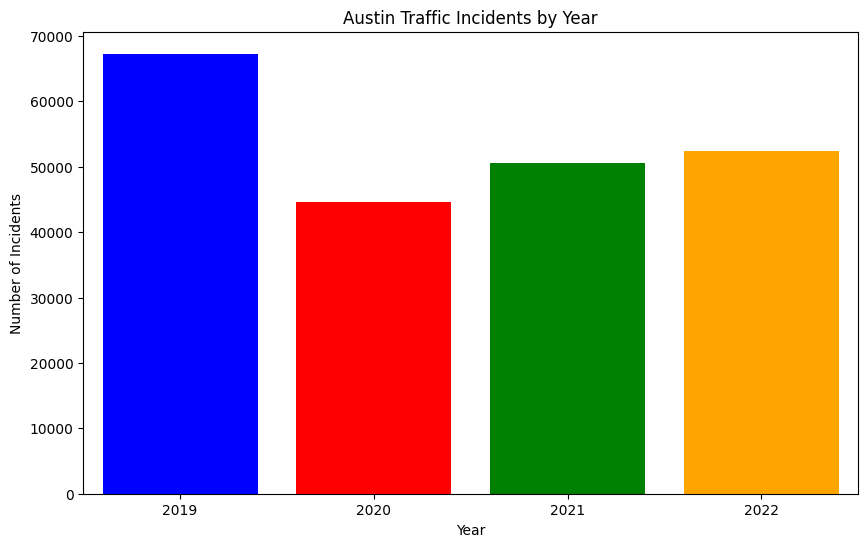

In [52]:
# Using lists to store results
years = [2019, 2020, 2021, 2022]
incident_counts = []

for year in years:
    year_data = austin_data[austin_data['Year'] == year]
    incident_counts.append(len(year_data))

plt.figure(figsize=(10, 6))
plt.bar(years, incident_counts, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Austin Traffic Incidents by Year')

# Fix the x-axis
plt.xticks(years)  # This sets the tick positions to exactly match your years
plt.xlim(2018.5, 2022.5)  # Optional: set limits for better spacing

plt.show()

### Tuples: Immutable Sequences

Tuples are like lists but cannot be modified after creation. Use them when data shouldn't change.

In [53]:
# Tuple of Austin's coordinates (shouldn't change)
austin_center = (30.2672, -97.7431)
lat, lon = austin_center  # Unpack tuple

print(f"Austin center: {austin_center}")
print(f"Latitude: {lat}, Longitude: {lon}")

# Tuples are immutable
# austin_center[0] = 31.0  # This would cause an error

Austin center: (30.2672, -97.7431)
Latitude: 30.2672, Longitude: -97.7431


### Dictionaries: Structured Data Storage

Dictionaries store key-value pairs. Perfect for organizing related data.

In [54]:
# Simple dictionary for one year
year_2020_stats = {
    'total': 45321,
    'crashes': 12543,
    'peak_hour': 17,
    'worst_month': 'October'
}

print(f"2020 total incidents: {year_2020_stats['total']}")
print(f"2020 peak hour: {year_2020_stats['peak_hour']}:00")

2020 total incidents: 45321
2020 peak hour: 17:00


In [55]:
# Why dictionaries? Store multiple statistics per year
yearly_analysis = {}

for year in [2019, 2020, 2021]:  
    year_data = austin_data[austin_data['Year'] == year]
    
    if len(year_data) > 0:
        # Store multiple values for each year
        yearly_analysis[year] = {
            'total': len(year_data),
            'crashes': len(year_data[year_data['Issue Reported'] == 'Crash Urgent']),
            'collisions': len(year_data[year_data['Issue Reported'] == 'COLLISION']),
            'peak_hour': year_data['Hour'].mode()[0] if len(year_data) > 0 else None
        }

# Display results
for year, stats in yearly_analysis.items():
    print(f"\n{year}:")
    print(f"  Total: {stats['total']:,}")
    print(f"  Crashes: {stats['crashes']:,}")
    print(f"  Collisions: {stats['collisions']:,}")
    print(f"  Peak hour: {stats['peak_hour']}:00")


2019:
  Total: 67,278
  Crashes: 16,318
  Collisions: 5,561
  Peak hour: 22:00

2020:
  Total: 44,631
  Crashes: 10,950
  Collisions: 4,305
  Peak hour: 22:00

2021:
  Total: 50,631
  Crashes: 12,325
  Collisions: 5,659
  Peak hour: 22:00


### Nested Loops: Multiple Dimensions

Analyze combinations: each location across each year

In [56]:
# Find top incident locations
top_locations = austin_data['Address'].value_counts().head(3).index
years = [2019, 2020, 2021]

# Analyze each location across years
for location in top_locations:
    print(f"\n{location[:50]}...")  # Truncate long addresses
    location_data = austin_data[austin_data['Address'] == location]
    
    for year in years:
        year_loc_data = location_data[location_data['Year'] == year]
        count = len(year_loc_data)
        print(f"  {year}: {count} incidents")


9300 S Ih 35 Svrd Sb...
  2019: 47 incidents
  2020: 20 incidents
  2021: 19 incidents

E Parmer Ln & Dessau Rd...
  2019: 42 incidents
  2020: 33 incidents
  2021: 49 incidents

710 E Ben White Blvd Svrd Wb...
  2019: 40 incidents
  2020: 25 incidents
  2021: 20 incidents


### Loop-based Hourly Analysis

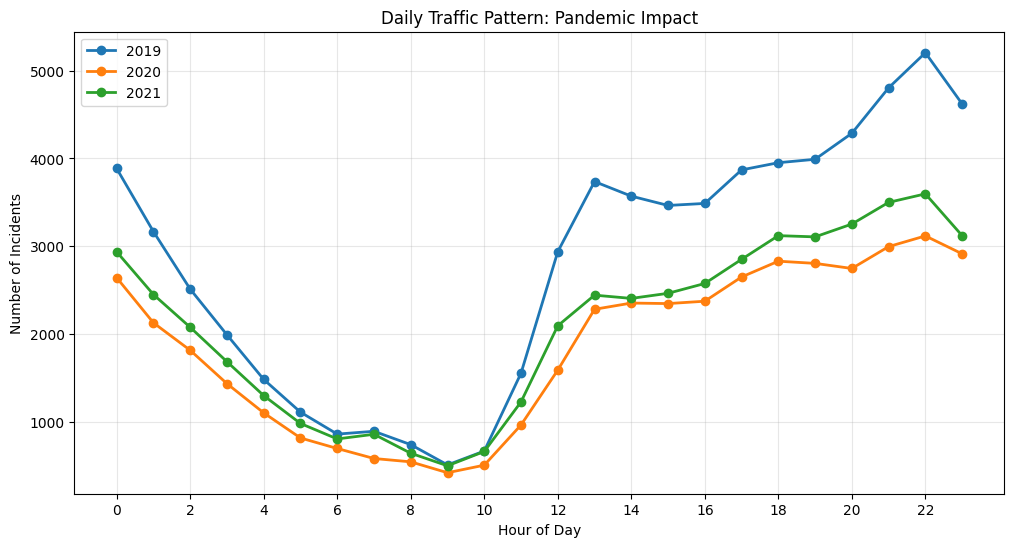

In [57]:
# Compare hourly patterns across years
hours = range(24)
plt.figure(figsize=(12, 6))

for year in [2019, 2020, 2021]:
    year_data = austin_data[austin_data['Year'] == year]
    hourly_counts = []
    
    for hour in hours:
        hour_count = len(year_data[year_data['Hour'] == hour])
        hourly_counts.append(hour_count)
    
    plt.plot(hours, hourly_counts, marker='o', label=str(year), linewidth=2)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.title('Daily Traffic Pattern: Pandemic Impact')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.show()

### Finding Peak Incident Types by Year

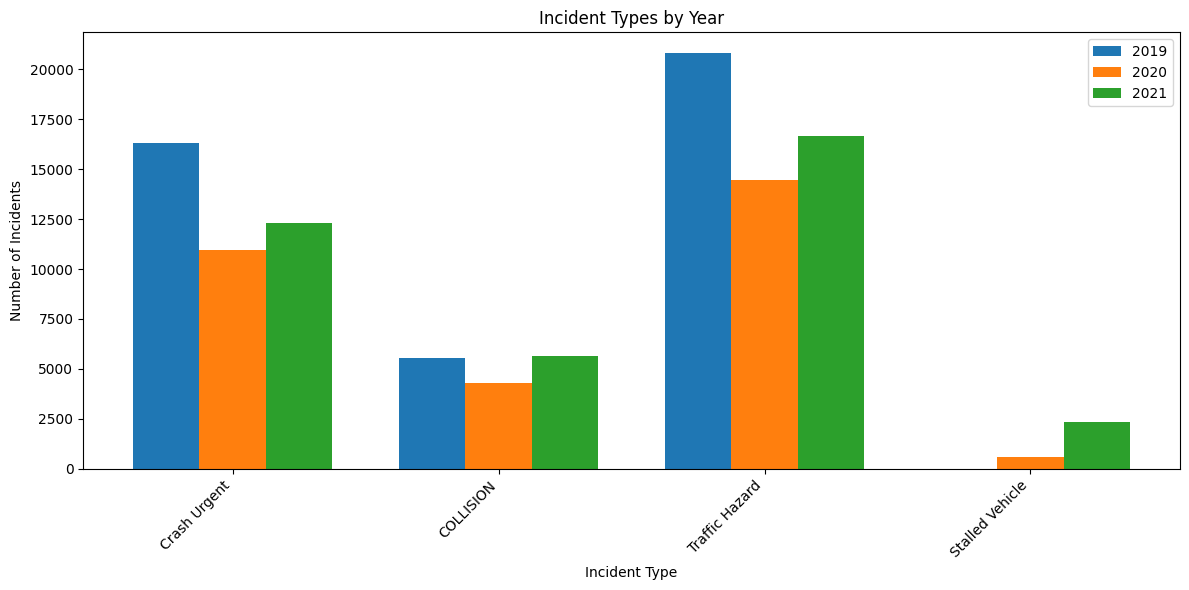

In [58]:
# Track incident types across years
incident_types_to_track = ['Crash Urgent', 'COLLISION', 'Traffic Hazard', 'Stalled Vehicle']
years = [2019, 2020, 2021]

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(incident_types_to_track))
width = 0.25

for i, year in enumerate(years):
    year_data = austin_data[austin_data['Year'] == year]
    counts = []
    
    for incident_type in incident_types_to_track:
        type_count = len(year_data[year_data['Issue Reported'] == incident_type])
        counts.append(type_count)
    
    ax.bar(x + i*width, counts, width, label=str(year))

ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incident Types by Year')
ax.set_xticks(x + width)
ax.set_xticklabels(incident_types_to_track, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

## Engineering Summary

Through computational analysis of Austin's traffic data, we've discovered:
1. Data quality issues requiring filtering (invalid coordinates)
2. Pandemic impact on traffic patterns
3. Spatial distribution of different incident types
4. Temporal patterns revealing peak risk hours

These insights enable data-driven infrastructure planning and resource allocation.